In [1]:
### Importing Required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


### Avoiding Warnings
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
### Extracting the Data
df = pd.read_csv(r"/content/kiva_loans.csv")

In [3]:
### Reading the Data
df.head()

,id,funded_amount,loan_amount,activity,sector,use,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300,300,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12.0,NaN,female,irregular,1/1/2014
1,653053,575,575,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14.0,NaN,"female, female",irregular,1/1/2014
2,653068,150,150,Transportation,Transportation,To repair their old cycle-van and buy another ...,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6.0,"user_favorite, user_favorite",female,bullet,1/1/2014
3,653063,200,200,Embroidery,Arts,to purchase an embroidery machine and a variet...,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8.0,NaN,female,irregular,1/1/2014
4,653084,400,400,Milk Sales,Food,to purchase one buffalo.,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16.0,NaN,female,monthly,1/1/2014


In [4]:
df.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'partner_id', 'posted_time', 'disbursed_time', 'funded_time',
       'term_in_months', 'lender_count', 'tags', 'borrower_genders',
       'repayment_interval', 'date'],
      dtype='object')

In [5]:
### Feature Selection
required_columns = ['funded_amount','loan_amount','sector','term_in_months','borrower_genders','repayment_interval']
df = df[required_columns]
df.head()

,funded_amount,loan_amount,sector,term_in_months,borrower_genders,repayment_interval
0,300,300,Food,12.0,female,irregular
1,575,575,Transportation,11.0,"female, female",irregular
2,150,150,Transportation,43.0,female,bullet
3,200,200,Arts,11.0,female,irregular
4,400,400,Food,14.0,female,monthly


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243941 entries, 0 to 243940
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       243941 non-null  int64  
 1   loan_amount         243941 non-null  int64  
 2   sector              243940 non-null  object 
 3   term_in_months      243940 non-null  float64
 4   borrower_genders    240797 non-null  object 
 5   repayment_interval  243940 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 11.2+ MB


In [7]:
df.isnull().sum()

funded_amount            0
loan_amount              0
sector                   1
term_in_months           1
borrower_genders      3144
repayment_interval       1
dtype: int64

In [8]:
### Handling NaN values
df = df.dropna()
df.isnull().sum()

funded_amount         0
loan_amount           0
sector                0
term_in_months        0
borrower_genders      0
repayment_interval    0
dtype: int64

In [9]:
df['funded'] = df['loan_amount'] - df['funded_amount']
df.tail()

,funded_amount,loan_amount,sector,term_in_months,borrower_genders,repayment_interval,funded
243935,775,1000,Housing,26.0,male,monthly,225
243936,625,625,Housing,15.0,female,monthly,0
243937,4850,4850,Clothing,9.0,"female, female, female, male, female, female, ...",monthly,0
243938,3100,3100,Food,23.0,female,monthly,0
243939,400,400,Services,14.0,female,monthly,0


In [10]:
df = df[df['funded']>=0]
df.shape

(240797, 7)

In [11]:
### classifying whether a person will get a loan or not
### replacing the values in funded columns as 0 or 1
### 0 suggests that the person either doesn't get the loan 
### 1 suggests that the person partially gets the loan
### Similiarly, 2 in the funded columns tells us that the person gets the loan

def encoder(dataset):
  a = list(dataset.loc[dataset['funded_amount'] == 0].index)
  b = list(dataset.loc[dataset['funded'] == 0].index)
  c = list(dataset.loc[dataset['funded'] != 0].index)

  dataset.funded.loc[c] = 1
  dataset.funded.loc[b] = 2
  dataset.funded.loc[a] = 0

encoder(df)
df.tail()

,funded_amount,loan_amount,sector,term_in_months,borrower_genders,repayment_interval,funded
243935,775,1000,Housing,26.0,male,monthly,1
243936,625,625,Housing,15.0,female,monthly,2
243937,4850,4850,Clothing,9.0,"female, female, female, male, female, female, ...",monthly,2
243938,3100,3100,Food,23.0,female,monthly,2
243939,400,400,Services,14.0,female,monthly,2


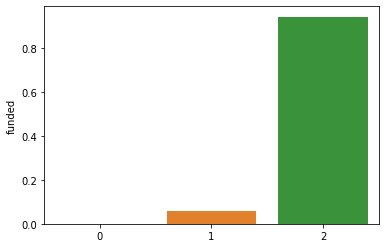

In [12]:
sns.barplot(x = df.funded.value_counts(normalize = True).index, y=df.funded.value_counts(normalize = True))

In [13]:
### putting the value in borrower_genders column as 1 where atleast one male member is present else 0

lst = []
for i in range(1,301):
  lst.append(('female, '*i).strip()[:len(('female, '*i).strip())-1])

df['borrower_genders'].replace(to_replace=lst, value=['female' for x in range(1,301)], inplace=True)

df['borrower_genders'] = np.where(df['borrower_genders']=='female', 0, 1)
df.head()

,funded_amount,loan_amount,sector,term_in_months,borrower_genders,repayment_interval,funded
0,300,300,Food,12.0,0,irregular,2
1,575,575,Transportation,11.0,0,irregular,2
2,150,150,Transportation,43.0,0,bullet,2
3,200,200,Arts,11.0,0,irregular,2
4,400,400,Food,14.0,0,monthly,2


In [14]:
### Changing the column borrowers_gender to has_males where 1 suggest that atleast 1 male member is present
df.rename({'borrower_genders':'has_males'}, axis=1, inplace=True)
df.head()

,funded_amount,loan_amount,sector,term_in_months,has_males,repayment_interval,funded
0,300,300,Food,12.0,0,irregular,2
1,575,575,Transportation,11.0,0,irregular,2
2,150,150,Transportation,43.0,0,bullet,2
3,200,200,Arts,11.0,0,irregular,2
4,400,400,Food,14.0,0,monthly,2


In [15]:
df.has_males.value_counts()

0    175201
1     65596
Name: has_males, dtype: int64

In [16]:
df.tail()

,funded_amount,loan_amount,sector,term_in_months,has_males,repayment_interval,funded
243935,775,1000,Housing,26.0,1,monthly,1
243936,625,625,Housing,15.0,0,monthly,2
243937,4850,4850,Clothing,9.0,1,monthly,2
243938,3100,3100,Food,23.0,0,monthly,2
243939,400,400,Services,14.0,0,monthly,2


In [17]:
df.sector.value_counts()

Agriculture       64078
Food              50300
Retail            46837
Services          16601
Housing           13914
Clothing          13181
Education         10677
Personal Use       7571
Transportation     5966
Arts               3677
Construction       2601
Manufacturing      2533
Health             2326
Entertainment       291
Wholesale           244
Name: sector, dtype: int64

In [18]:
others = list(df.sector.value_counts()[df.sector.value_counts(normalize=True)*100 < 5].index)
df['sector'] = df.sector.replace(to_replace = others, value = ['others' for x in range(0,len(others))])

In [19]:
df = pd.get_dummies(df)
df.head()

,funded_amount,loan_amount,term_in_months,has_males,funded,sector_Agriculture,sector_Clothing,sector_Food,sector_Housing,sector_Retail,sector_Services,sector_others,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,repayment_interval_weekly
0,300,300,12.0,0,2,0,0,1,0,0,0,0,0,1,0,0
1,575,575,11.0,0,2,0,0,0,0,0,0,1,0,1,0,0
2,150,150,43.0,0,2,0,0,0,0,0,0,1,1,0,0,0
3,200,200,11.0,0,2,0,0,0,0,0,0,1,0,1,0,0
4,400,400,14.0,0,2,0,0,1,0,0,0,0,0,0,1,0


2    227045
1     13637
0       115
Name: funded, dtype: int64
------------------------------------------------------------------


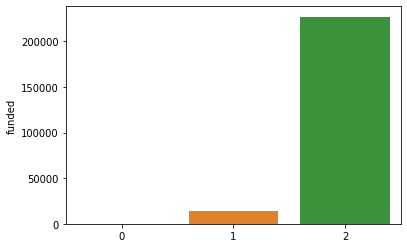

In [20]:
print(df['funded'].value_counts())
print('------------------------------------------------------------------')
sns.barplot(x=df['funded'].value_counts().index, y=df['funded'].value_counts())
plt.show()

In [21]:
df.index = [x for x in range(0,len(df.index))]

Resampling Data

In [22]:
X = df.drop(['funded','funded_amount'],axis=1)
y = df['funded']

In [23]:
### performing SMOTE to over-sample the data 
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE()
x_smk, y_smk = over_sampler.fit_sample(X, y)

2    227045
1    227045
0    227045
dtype: int64
------------------------------------------------------------------


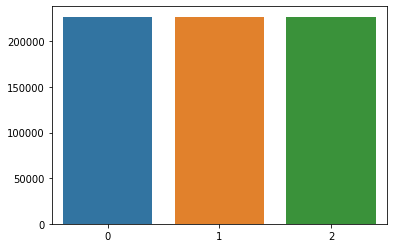

In [24]:
print(pd.Series(y_smk).value_counts())
print('------------------------------------------------------------------')
sns.barplot(x = pd.Series(y_smk).value_counts().index, y = pd.Series(y_smk).value_counts())
plt.show()

Doing Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smk, y_smk, test_size = 0.25, random_state=None)

Model Creation

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

### performance metrics

print('Accuracy score for this classification is : {}'.format(accuracy_score(y_test, model.predict(x_test))))
print('confusion matrix : \n', confusion_matrix(y_test, model.predict(x_test)))
print('classification report : \n', classification_report(y_test, model.predict(x_test)))

Accuracy score for this classification is : 0.7941967536585939
confusion matrix : 
 [[55699  1256    17]
 [ 3681 39149 13795]
 [ 1979 14317 40391]]
classification report : 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     56972
           1       0.72      0.69      0.70     56625
           2       0.75      0.71      0.73     56687

    accuracy                           0.79    170284
   macro avg       0.79      0.79      0.79    170284
weighted avg       0.79      0.79      0.79    170284



In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

### performance metrics

print('Accuracy score for this classification is : {}'.format(accuracy_score(y_test, model.predict(x_test))))
print('confusion matrix : \n', confusion_matrix(y_test, model.predict(x_test)))
print('classification report : \n', classification_report(y_test, model.predict(x_test)))

Accuracy score for this classification is : 0.9365060722087806
confusion matrix : 
 [[56908    62     2]
 [  560 52789  3276]
 [    7  6905 49775]]
classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     56972
           1       0.88      0.93      0.91     56625
           2       0.94      0.88      0.91     56687

    accuracy                           0.94    170284
   macro avg       0.94      0.94      0.94    170284
weighted avg       0.94      0.94      0.94    170284



In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 20)
model.fit(x_train, y_train)

### performance metrics

print('Accuracy score for this classification is : {}'.format(accuracy_score(y_test, model.predict(x_test))))
print('confusion matrix : \n', confusion_matrix(y_test, model.predict(x_test)))
print('classification report : \n', classification_report(y_test, model.predict(x_test)))

Accuracy score for this classification is : 0.9269044654811961
confusion matrix : 
 [[56936    29     7]
 [  601 52316  3708]
 [   21  8081 48585]]
classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     56972
           1       0.87      0.92      0.89     56625
           2       0.93      0.86      0.89     56687

    accuracy                           0.93    170284
   macro avg       0.93      0.93      0.93    170284
weighted avg       0.93      0.93      0.93    170284



In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)

### performance metrics

print('Accuracy score for this classification is : {}'.format(accuracy_score(y_test, model.predict(x_test))))
print('confusion matrix : \n', confusion_matrix(y_test, model.predict(x_test)))
print('classification report : \n', classification_report(y_test, model.predict(x_test)))

Accuracy score for this classification is : 0.8933898663409363
confusion matrix : 
 [[56934    37     1]
 [ 1292 51127  4206]
 [  395 12223 44069]]
classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     56972
           1       0.81      0.90      0.85     56625
           2       0.91      0.78      0.84     56687

    accuracy                           0.89    170284
   macro avg       0.90      0.89      0.89    170284
weighted avg       0.90      0.89      0.89    170284



from here, we infer that RandomForest Classifier is giving us the maximum accuracy. So we make our prediction model based on Random Forests.


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
import pickle
pickle.dump(model, open(r"/content/model_clf.pkl", 'wb'))

### For Regression part

In [33]:
df1 = df[df.funded == 1]

In [34]:
df1.head(2)

,funded_amount,loan_amount,term_in_months,has_males,funded,sector_Agriculture,sector_Clothing,sector_Food,sector_Housing,sector_Retail,sector_Services,sector_others,repayment_interval_bullet,repayment_interval_irregular,repayment_interval_monthly,repayment_interval_weekly
87,4275,5000,39.0,1,1,0,0,0,1,0,0,0,0,0,1,0
112,1925,2400,15.0,1,1,0,0,0,0,0,1,0,0,0,1,0


In [35]:
X = df.drop(['funded_amount', 'funded'],axis = 1)
y = df['funded_amount']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = None)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print('r2score : ', r2_score(y_test, model.predict(x_test)))

r2score :  0.9431872781987553


In [39]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
print('r2score : ', r2_score(y_test, model.predict(x_test)))

r2score :  0.9574338360302402


In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
print('r2score : ', r2_score(y_test, model.predict(x_test)))

r2score :  0.9686746520553248


In [41]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
print('r2score : ', r2_score(y_test, model.predict(x_test)))

[05:26:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2score :  0.9623911027476459


from here, we infer that RandomForest Regressor is giving us the maximum accuracy. So we make our prediction model based on Random Forests.


In [42]:
model_reg = RandomForestRegressor()
model_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
pickle.dump(model_reg, open("/content/model_reg.pkl", "wb"))

In [44]:
model_clf = pickle.load(open(r"/content/model_clf.pkl", "rb"))

In [45]:
df.columns = ['funded_amount','loan_amount', 'term_in_months', 'has_male',
       'funded','Agriculture', 'Food', 'Housing',
       'Personal Use', 'Retail', 'Services',
       'others', 'bullet',
       'irregular', 'monthly',
       'weekly']
df.head(3)

,funded_amount,loan_amount,term_in_months,has_male,funded,Agriculture,Food,Housing,Personal Use,Retail,Services,others,bullet,irregular,monthly,weekly
0,300,300,12.0,0,2,0,0,1,0,0,0,0,0,1,0,0
1,575,575,11.0,0,2,0,0,0,0,0,0,1,0,1,0,0
2,150,150,43.0,0,2,0,0,0,0,0,0,1,1,0,0,0


In [46]:
model_reg = pickle.load(open(r"/content/model_reg.pkl", "rb"))

In [47]:
pickle.dump(df, open("/content/dataframe.pkl", 'wb'))